# __Visualizacion de datos__

## Importar librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Cargar datos

In [2]:
df = pd.read_csv('./data_in/inmigrantes_canada.csv')
df.head()

,Pais,Continente,Region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afganistán,Asia,Sur de Asia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europa,Sur de Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argelia,África,Norte de África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceanía,Polinesia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sur de Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [3]:
# dimensiones de los datos
df.shape

(195, 38)

> Los datos presentan 195 registros y 38 variables

## Acerca de los datos

Fuimos contratados como analistas de datos para trabajar en una consultoría que presta servicios de migración para colombianos que desean viajar a Canadá. En este proyecto, estaremos analizando un conjunto de datos que contiene información histórica sobre la inmigración en Canadá proveniente de todos los países del mundo desde el año 1980 hasta el año 2013.

Tenemos la columna país, la columna continente, la columna región, y la columna que lleva los números de los años entre 1980 y 2013. Tenemos 33 años de registro y el total de inmigrantes en Canadá durante ese periodo.


## Filtrar de datos de Colombia 

In [4]:
# mostrar el tipo de dato de cada vaiable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pais        195 non-null    object
 1   Continente  195 non-null    object
 2   Region      195 non-null    object
 3   1980        195 non-null    int64 
 4   1981        195 non-null    int64 
 5   1982        195 non-null    int64 
 6   1983        195 non-null    int64 
 7   1984        195 non-null    int64 
 8   1985        195 non-null    int64 
 9   1986        195 non-null    int64 
 10  1987        195 non-null    int64 
 11  1988        195 non-null    int64 
 12  1989        195 non-null    int64 
 13  1990        195 non-null    int64 
 14  1991        195 non-null    int64 
 15  1992        195 non-null    int64 
 16  1993        195 non-null    int64 
 17  1994        195 non-null    int64 
 18  1995        195 non-null    int64 
 19  1996        195 non-null    int64 
 20  1997      

> Las variables Pais, Continente y Region son de tipo object, el resto son enteras.

> Todas las variables presentan 195 datos lo que indican que no hay valores faltantes.

Vamos a configurar como indice, los valores de Pais, para de esta forma centrarnos en la migracion de colombianos a Canada. 

In [5]:
df.set_index('Pais', inplace=True)
df

,Continente,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pais,,,,,,,,,,,,,,,,,,,,,
Afganistán,Asia,Sur de Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europa,Sur de Europa,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Argelia,África,Norte de África,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Samoa Americana,Oceanía,Polinesia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europa,Sur de Europa,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,Asia,Sudeste Asiático,1191,1829,2162,3404,7583,5907,2741,1406,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Sahara Occidental,África,Norte de África,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Asia Occidental,1,2,1,6,0,18,7,12,...,161,140,122,133,128,211,160,174,217,2985


Generamos un nuevo datafame que contengan los anos y la cantidad de migrantes de Colombia.

In [6]:
# lista de string de los anos
anos = list(map(str, range(1980,2014)))

In [7]:
# filtro que considera los anos y su respectiva cantidad de migrantes colombianos
colombia = df.loc['Colombia', anos]
colombia

1980     266
1981     326
1982     360
1983     244
1984     235
1985     214
1986     257
1987     376
1988     352
1989     439
1990     614
1991     652
1992     582
1993     464
1994     375
1995     371
1996     381
1997     578
1998     929
1999    1306
2000    2259
2001    2965
2002    3283
2003    4318
2004    4566
2005    6424
2006    6535
2007    5357
2008    5452
2009    4652
2010    5218
2011    4366
2012    3741
2013    3631
Name: Colombia, dtype: object

Hemos generado una serie con los datos que buscamos. Vamos a convertirlos en un dataframe para una mejor manipulacion.

In [8]:
# diccionario con los datos a convertir
col_dict = {
    'Año': colombia.index.tolist(),
    'Inmigantes': colombia.values.tolist()
}

In [9]:
# creamos el dataframe
datos_col = pd.DataFrame(col_dict)
datos_col.tail()

,Año,Inmigantes
29,2009,4652
30,2010,5218
31,2011,4366
32,2012,3741
33,2013,3631


## Visualizacion de datos de interes

Queremos conocer la tendencia de los inmigrantes colombianos en Canada durante el peiodo de tiempo dado.

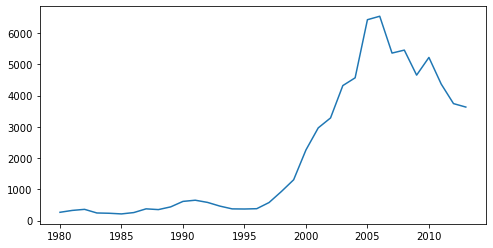

In [10]:
# tamano de la grafica
plt.figure(figsize=(8,4))

# anos como variable X. inmigrantes como variable Y
plt.plot(datos_col['Año'], datos_col['Inmigantes'])
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.show()

## Personalizar grafico

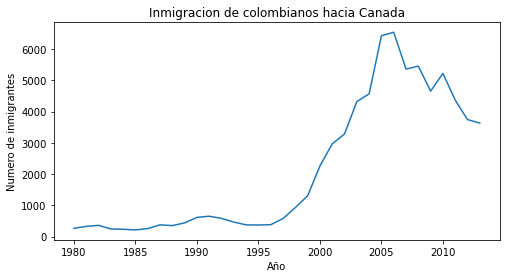

In [11]:
# tamano de la grafica
plt.figure(figsize=(8,4))

# anos como variable X. inmigrantes como variable Y
plt.plot(datos_col['Año'], datos_col['Inmigantes'])

# rango de valores en el eje X
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])

# agregar titulo
plt.title('Inmigracion de colombianos hacia Canada')

# etiqueta de los ejes
plt.xlabel('Año')
plt.ylabel('Numero de inmigrantes')

# mostrar
plt.show()

> En el periodo entre 1980 y 1996, el volumen de inmigrantes colombianos hacia Canada se mantuvo por debajo de 1000.

> A partir de 1997 hasta 2005, el crecimiento de la inmigracion colombiana fue constante alcanzando mas de 6000 en su pico mas alto.

> A partir de 2006 la tendencia fue a la baja

## Filtrar datos de Brasil y Argentina

In [12]:
# seleccionar datos de brasil y argentina
df_compare = df.loc[['Brasil', 'Argentina'], anos]
df_compare

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Pais,,,,,,,,,,,,,,,,,,,,,
Brasil,211,220,192,139,145,130,205,244,394,650,...,917,969,1181,1746,2138,2509,2598,1508,1642,1714
Argentina,368,426,626,241,237,196,213,519,374,538,...,1591,1153,847,620,540,467,459,278,263,282


In [13]:
# invertir datos de filas a columnas
df_compare = df_compare.T
df_compare

Pais,Brasil,Argentina
1980,211,368
1981,220,426
1982,192,626
1983,139,241
1984,145,237
1985,130,196
1986,205,213
1987,244,519
1988,394,374
1989,650,538


## Visualizacion de los datos

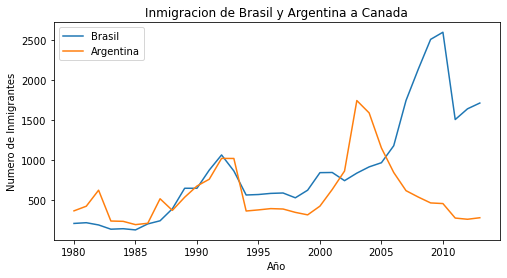

In [14]:
# tamano de la grafica
plt.figure(figsize=(8,4))

# crear ambas graficas
plt.plot(df_compare['Brasil'], label='Brasil')
plt.plot(df_compare['Argentina'], label='Argentina')

# titulo
plt.title('Inmigracion de Brasil y Argentina a Canada')

# etiquetas
plt.xlabel('Año')
plt.ylabel('Numero de Inmigrantes')

# rango en X
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])

# leyenda
plt.legend()

plt.show()

> La tendencia de inmigrantes de ambos paises a Canada se mantuvo muy similar de 1980 hasta 2000. De alli en adelante presentan diferencias.

> En 2004 los inmigrantes argentinos alcanzan su pico maximo de mas de 1800 personas.

> En 2010 los inmigrantes brasileños alcanzan su pico maximo de mas de 2500 personas.

## Creando figuras

En las graficas anteriores, trabajamos los graficos sin almacenar en variables lo que nos limita a aplicar otros metodos que pueden mejorar la visualizacion con Matplolib y otras bibliotecas.

Las visualizaciones se dividen en lienzo, que es donde se grafica, y la grafica misma. Vamos a generar variables que nos permitan tener el lienzo y la grafica por aparte y de esta manera customizar cada elemento de manera independiente

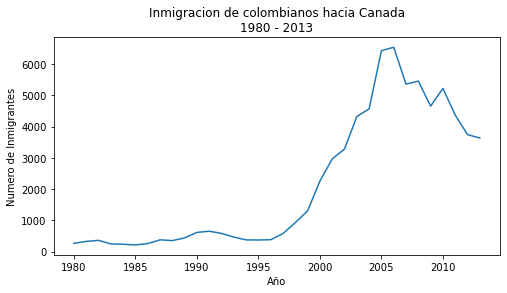

In [15]:
# definimos lienzo (fig) y grafica (ax)
fig, ax = plt.subplots(figsize=(8,4))

# creamos la grafica
ax.plot(datos_col['Año'], datos_col['Inmigantes'])

# definir rango en x dinamicamente
ax.xaxis.set_major_locator(plt.MultipleLocator(5))

# agregar titulo
ax.set_title('Inmigracion de colombianos hacia Canada\n1980 - 2013')

# agregar etiquetas
ax.set_xlabel('Año')
ax.set_ylabel('Numero de Inmigrantes')

plt.show()

## Dos graficas a la vez

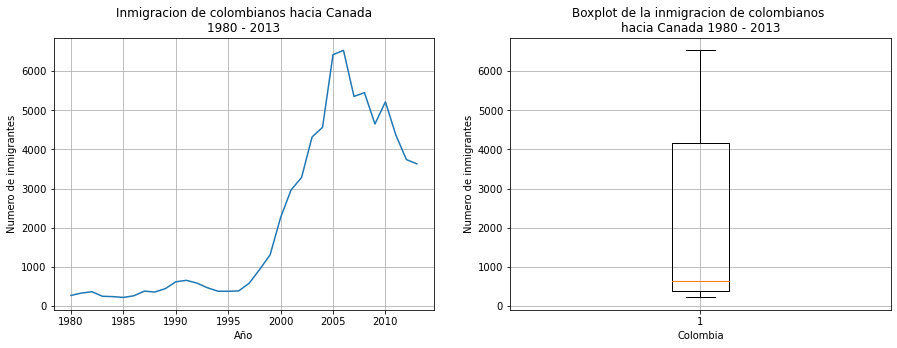

In [16]:
# definir lienzo de una fila y dos columnas
fig, axs = plt.subplots(1, 2, figsize=(15,5))

# grafica de linea
axs[0].plot(datos_col['Año'], datos_col['Inmigantes'])
axs[0].set_title('Inmigracion de colombianos hacia Canada\n1980 - 2013')
axs[0].set_xlabel('Año')
axs[0].set_ylabel('Numero de inmigrantes')
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))
axs[0].grid()

# boxplot
axs[1].boxplot(datos_col['Inmigantes'])
axs[1].set_title('Boxplot de la inmigracion de colombianos \nhacia Canada 1980 - 2013')
axs[1].set_xlabel('Colombia')
axs[1].set_ylabel('Numero de inmigrantes')
axs[1].grid()

plt.show()

> La grafica de la derecha muestra la distribucion de los datos.

> Hasta el 25% del periodo analizado (primer cuartil) hay 200 inmigrantes.

> La mediana de todo el periodo analizado, es de aproximadamente 600 inmigrantes.

> Hasta el 75% del periodo analizado (tercer cuartil) hay mas de 4000 inmigrantes.

Obtengamos la estadistica descriptiva que nos muestra la grafica de forma analitica con el metodo _describe_

In [17]:
datos_col.describe()

,Inmigantes
count,34.000000
mean,2120.235294
std,2163.761316
min,214.000000
25%,372.000000
50%,633.000000
75%,4173.750000
max,6535.000000


## Multiples graficas

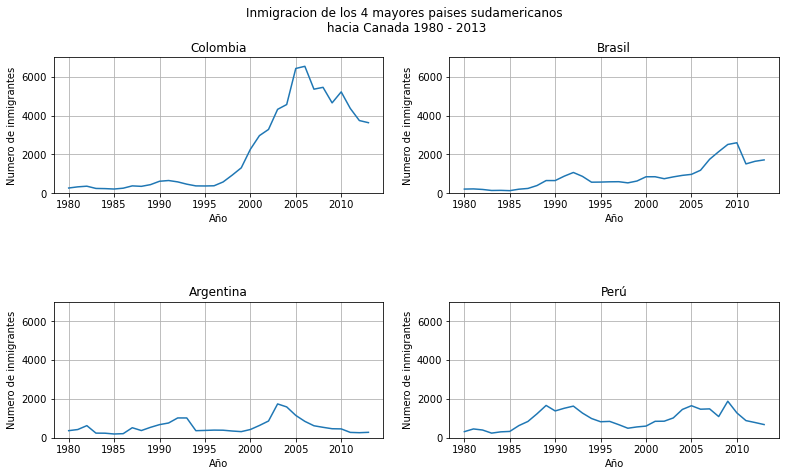

In [18]:
# definir lienzo de dos filas y dos columnas
fig, axs = plt.subplots(2, 2, figsize=(13,7))

# ajustar espacio entre subplot
fig.subplots_adjust(hspace=0.8, wspace=0.2)

# titulo de todo el lienzo
fig.suptitle('Inmigracion de los 4 mayores paises sudamericanos\n hacia Canada 1980 - 2013')

# grafica de linea
axs[0,0].plot(df.loc['Colombia', anos])
axs[0,0].set_title('Colombia')

axs[0,1].plot(df.loc['Brasil', anos])
axs[0,1].set_title('Brasil')

axs[1,0].plot(df.loc['Argentina', anos])
axs[1,0].set_title('Argentina')

axs[1,1].plot(df.loc['Perú', anos])
axs[1,1].set_title('Perú')


ymin, ymax = 0, 7000

# configurar misma escala para todos los graficos
for ax in axs.ravel():
    ax.set_ylim(ymin, ymax)

# personalizar cada grafico
for ax in axs.flat:
    ax.xaxis.set_major_locator(plt.MultipleLocator(5))
    ax.set_xlabel('Año')
    ax.set_ylabel('Numero de inmigrantes')
    ax.grid()

plt.show()

## Personalizar visualizaciones con Matplotlib

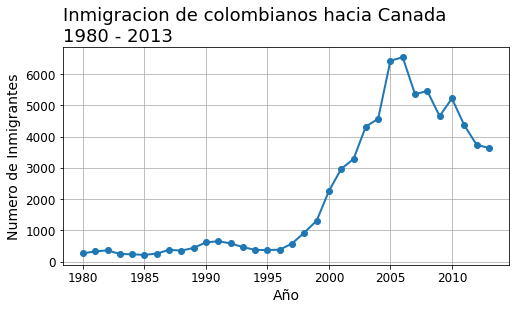

In [19]:
# definimos lienzo (fig) y grafica (ax)
fig, ax = plt.subplots(figsize=(8,4))

# creamos la grafica
ax.plot(datos_col['Año'], datos_col['Inmigantes'], lw=2, marker='o')


# definir rango en x dinamicamente
ax.xaxis.set_major_locator(plt.MultipleLocator(5))

# agregar titulo
ax.set_title('Inmigracion de colombianos hacia Canada\n1980 - 2013', fontsize=18, loc='left')

# agregar etiquetas
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Numero de Inmigrantes', fontsize=14)

# modificar tamano de fuente de etiquetas
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

ax.grid()
plt.show()

## Agregar colores

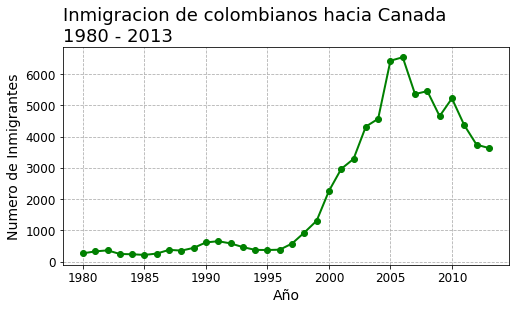

In [20]:
# definimos lienzo (fig) y grafica (ax)
fig, ax = plt.subplots(figsize=(8,4))

# creamos la grafica
ax.plot(datos_col['Año'], datos_col['Inmigantes'], lw=2, marker='o', color='g')


# definir rango en x dinamicamente
ax.xaxis.set_major_locator(plt.MultipleLocator(5))

# agregar titulo
ax.set_title('Inmigracion de colombianos hacia Canada\n1980 - 2013', fontsize=18, loc='left')

# agregar etiquetas
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Numero de Inmigrantes', fontsize=14)

# modificar tamano de fuente de etiquetas
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# cambiar estilo de linea de la grilla
ax.grid(linestyle = '--')
plt.show()

Vamos a crear un dataframe con los datos pertenecientes a paises sudamericanos

In [21]:
sudamerica = df.query('Region == "América del Sur"')
sudamerica.head(10)

,Continente,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pais,,,,,,,,,,,,,,,,,,,,,
Argentina,América Latina y el Caribe,América del Sur,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Bolivia,América Latina y el Caribe,América del Sur,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Brasil,América Latina y el Caribe,América del Sur,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,América Latina y el Caribe,América del Sur,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Colombia,América Latina y el Caribe,América del Sur,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088
Ecuador,América Latina y el Caribe,América del Sur,238,207,184,155,179,208,240,344,...,491,525,419,437,373,353,348,282,418,12233
Guyana,América Latina y el Caribe,América del Sur,2334,2943,3575,2650,1932,2299,3942,6174,...,1215,1286,1277,1137,1180,953,804,676,656,75785
Paraguay,América Latina y el Caribe,América del Sur,45,26,32,40,48,36,34,72,...,75,88,98,95,88,89,83,55,66,1944
Perú,América Latina y el Caribe,América del Sur,317,456,401,241,306,328,628,843,...,1653,1473,1490,1094,1884,1283,886,787,682,32652


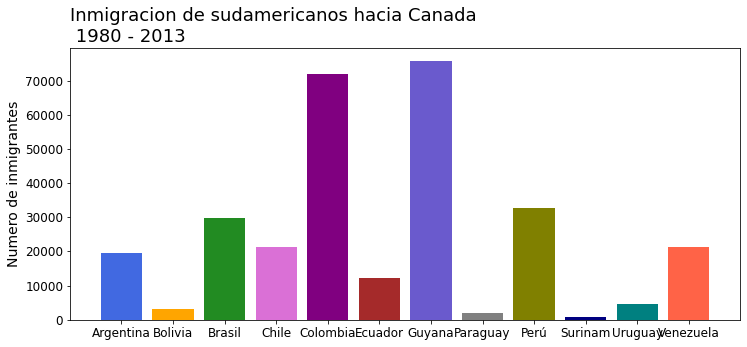

In [24]:
# definimos una lista de colores que usaremos para cada pais
colores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown', 'slateblue',
           'gray', 'olive', 'navy', 'teal', 'tomato']

# crear figura
fig, ax = plt.subplots(figsize=(12,5))

# crear grafico
ax.bar(sudamerica.index, sudamerica['Total'], color=colores)
ax.set_title('Inmigracion de sudamericanos hacia Canada\n 1980 - 2013', loc='left', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Numero de inmigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()
